# 2

In [43]:
import pandas as pd

In [44]:
cc = pd.read_csv("CC GENERAL.csv")
cc.drop("CUST_ID",axis=1, inplace=True)

In [45]:
cc.head()
#cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [46]:
#print(cc.isnull().sum()) # check for null values

In [47]:
#fill missing values in MINIMUM_PAYMENTS
mean_min_pay = int(cc.MINIMUM_PAYMENTS.dropna().mean())
cc['MINIMUM_PAYMENTS'] = cc['MINIMUM_PAYMENTS'].fillna(mean_min_pay)

In [48]:
#fill missing values in CREDIT_LIMIT
mean_cred_lim = int(cc.CREDIT_LIMIT.dropna().mean())
cc['CREDIT_LIMIT'] = cc['CREDIT_LIMIT'].fillna(mean_cred_lim)

In [49]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score 

In [50]:
ss = StandardScaler()
ss.fit(cc)
cc_transformed_ss = ss.transform(cc)

In [51]:
n = Normalizer()
cc_ss_norm = n.fit_transform(cc_transformed_ss)

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(cc_ss_norm)
cc_pca = pd.DataFrame(pca.transform(cc_ss_norm), columns = ['A', 'B'])

Silhouetter Score for 2 cluster ward linkage : 0.437324289843461
Silhouetter Score for 2 cluster single linkage : 0.1945059335195
Silhouetter Score for 2 cluster average linkage : 0.42242950997363227
Silhouetter Score for 2 cluster complete linkage : 0.33218800496096196
Silhouetter Score for 3 cluster ward linkage : 0.41672299503722665
Silhouetter Score for 3 cluster single linkage : -0.12691533057894885
Silhouetter Score for 3 cluster average linkage : 0.3872191970911931
Silhouetter Score for 3 cluster complete linkage : 0.4125839131384999
Silhouetter Score for 4 cluster ward linkage : 0.3531061925890205
Silhouetter Score for 4 cluster single linkage : -0.15655094746055415
Silhouetter Score for 4 cluster average linkage : 0.36203367435418715
Silhouetter Score for 4 cluster complete linkage : 0.34818457490268834
Silhouetter Score for 5 cluster ward linkage : 0.35055080040196146
Silhouetter Score for 5 cluster single linkage : -0.28685551902317896
Silhouetter Score for 5 cluster average

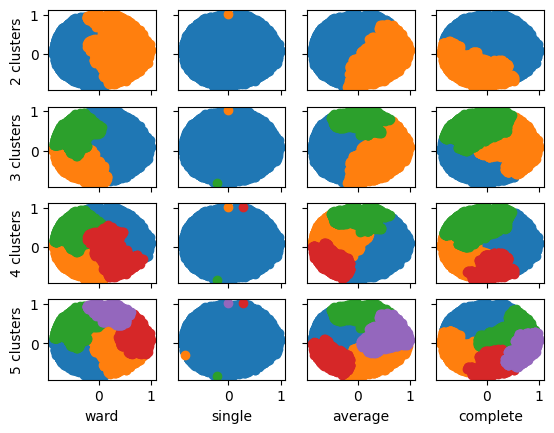

In [53]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(4, 4)
clust_range = [2,3,4,5]
silh_score = []
links = ["ward","single","average","complete"]
for n_clust in clust_range:
    clust_sil = []
    for j,tp in enumerate(links):
        ac = AgglomerativeClustering(n_clusters=n_clust, linkage=tp)
        label = ac.fit_predict(cc_pca)
        #Getting unique labels
        u_labels = np.unique(label)

        #plotting the results:
        for i in u_labels:
            axs[n_clust-2,j].scatter(cc_pca.loc[label == i , "A"] , cc_pca.loc[label == i , "B"] , label = i)
        
        axs[n_clust-2,j].set(xlabel=tp, ylabel=str(n_clust)+" clusters")
        score = silhouette_score(cc_pca, ac.labels_, metric='euclidean')
        clust_sil.append(score)
        print('Silhouetter Score for {} cluster {} linkage : {}'.format(n_clust,tp,score))
    silh_score.append(clust_sil)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

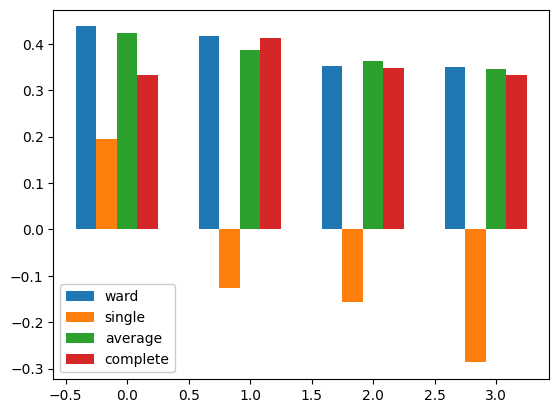

In [54]:
silh_score=np.array(silh_score)
x = np.arange(silh_score.shape[0])
dx = (np.arange(silh_score.shape[1])-silh_score.shape[1]/2.)/(silh_score.shape[1]+2.)
d = 1./(silh_score.shape[1]+2.)


fig, ax=plt.subplots()
for i,l in enumerate(links):
    ax.bar(x+dx[i],silh_score[:,i], width=d, label=l)

plt.legend(framealpha=1)
plt.show()

# 1

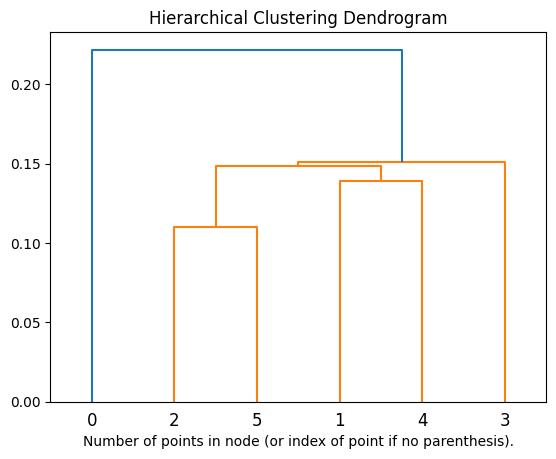

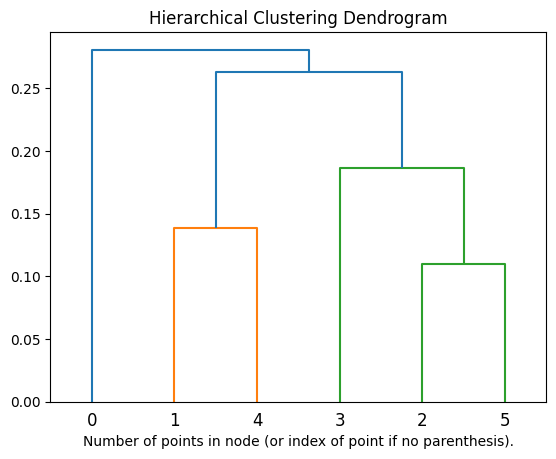

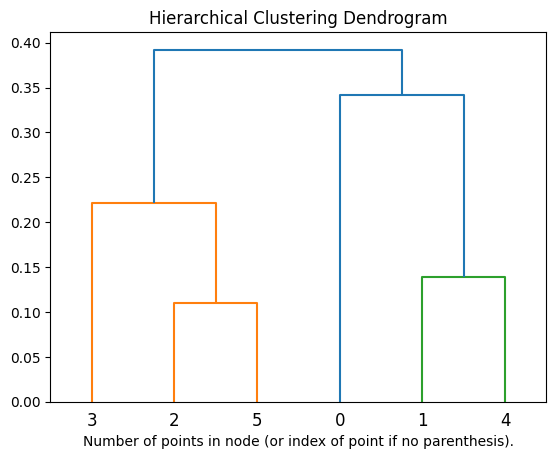

In [55]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
X = np.array([[0.4005,0.5306],[0.2148,0.3854],[0.3457,0.3156],
             [0.2652,0.1875],[0.0789,0.4139],[0.4548,0.3022]])
# setting distance_threshold=0 ensures we compute the full tree.
for l in links[1:]:
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=l)

    model = model.fit(X)
    plt.title("Hierarchical Clustering Dendrogram")
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode="level", p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()